In [3]:
install.packages("psych")
library(psych)

also installing the dependencies ‘tmvnsim’, ‘mnormt’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


# Data

In [4]:
dat = read.csv('dave_final.csv')

In [5]:
head(dat)

,X,PINST1,PINST2,PINST3,PINST4,PSOCP1,PSOCP2,PTRANS1,PTRANS2,PTRANS3,⋯,PSOCP11,PSOCP22,PTRANS11,PTRANS22,PTRANS33,PMSC11,PMSC22,PMSC33,PROFITS,AGE
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,4,4,5,5,3,4,5,5,5,⋯,3,4,5,5,5,5,5,5,33,2
2,1,3,4,1,4,4,4,3,2,3,⋯,4,4,3,2,3,5,5,5,33,2
3,2,4,4,5,4,4,5,5,5,5,⋯,4,5,5,5,5,5,5,5,33,2
4,3,4,4,5,5,5,4,5,5,5,⋯,5,4,5,5,5,5,5,5,36,5
5,4,4,4,4,4,4,5,5,5,4,⋯,4,5,5,5,4,5,5,4,37,3
6,5,3,4,4,4,4,4,5,5,5,⋯,4,4,5,5,5,5,5,5,36,3


### Describing Data

In [6]:
des = describe(dat)
knitr::kable(des[,c("min", "max", "mean", "median", "skew", "kurtosis")], main = "Data Summary")



|         | min| max|   mean| median|       skew|   kurtosis|
|:--------|---:|---:|------:|------:|----------:|----------:|
|X        |   0| 199| 99.500|   99.5|  0.0000000| -1.2180144|
|PINST1   |   3|   5|  3.905|    4.0| -0.9349855|  2.9028276|
|PINST2   |   4|   5|  4.110|    4.0|  2.4742175|  4.1425399|
|PINST3   |   1|   5|  4.025|    4.0| -2.1240773|  5.0481887|
|PINST4   |   4|   5|  4.215|    4.0|  1.3770681| -0.1041292|
|PSOCP1   |   3|   5|  4.020|    4.0|  0.0122015|  0.2991898|
|PSOCP2   |   2|   5|  4.105|    4.0| -1.2951899|  3.3529635|
|PTRANS1  |   3|   5|  4.740|    5.0| -2.0879107|  3.1049499|
|PTRANS2  |   2|   5|  4.610|    5.0| -2.3080482|  4.5266522|
|PTRANS3  |   3|   5|  4.410|    5.0| -0.7466378| -0.6620062|
|PMSC1    |   1|   4|  2.730|    3.0|  0.0711871| -1.0034279|
|PMSC2    |   3|   5|  4.495|    5.0| -0.8371060| -0.3418001|
|PMSC3    |   4|   5|  4.555|    5.0| -0.2196852| -1.9614709|
|PINST11  |   2|   5|  4.205|    4.0| -0.9613033|  3.8700531|
|PINST

### Drop index column, profits column, and age column. 

Profits and age are continuous variables, and they are causing problems in the calculation of the polychoric correlation which is desirable for categorical data. So I drop them. 

In [54]:
dat2 <- dat[-c(1, 27,26)]

In [55]:
head(dat2)

,PINST1,PINST2,PINST3,PINST4,PSOCP1,PSOCP2,PTRANS1,PTRANS2,PTRANS3,PMSC1,⋯,PINST33,PINST44,PSOCP11,PSOCP22,PTRANS11,PTRANS22,PTRANS33,PMSC11,PMSC22,PMSC33
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,4,4,5,5,3,4,5,5,5,4,⋯,5,5,3,4,5,5,5,5,5,5
2,3,4,1,4,4,4,3,2,3,4,⋯,5,4,4,4,3,2,3,5,5,5
3,4,4,5,4,4,5,5,5,5,3,⋯,5,5,4,5,5,5,5,5,5,5
4,4,4,5,5,5,4,5,5,5,2,⋯,5,5,5,4,5,5,5,5,5,5
5,4,4,4,4,4,5,5,5,4,2,⋯,5,4,4,5,5,5,4,5,5,4
6,3,4,4,4,4,4,5,5,5,4,⋯,5,5,4,4,5,5,5,5,5,5


In [56]:
dat = dat2
features = dat[1:24]

## Polychoric correlation

Polychoric correlation is desirable for factor analysis with categorical variables

Warning message in polychoric(features):
“The items do not have an equal number of response alternatives, global set to FALSE.”Warning message in matpLower(x, nvar, gminx, gmaxx, gminy, gmaxy):
“213 cells were adjusted for 0 values using the correction for continuity. Examine your data carefully.”Warning message in cor.smooth(mat):
“Matrix was not positive definite, smoothing was done”

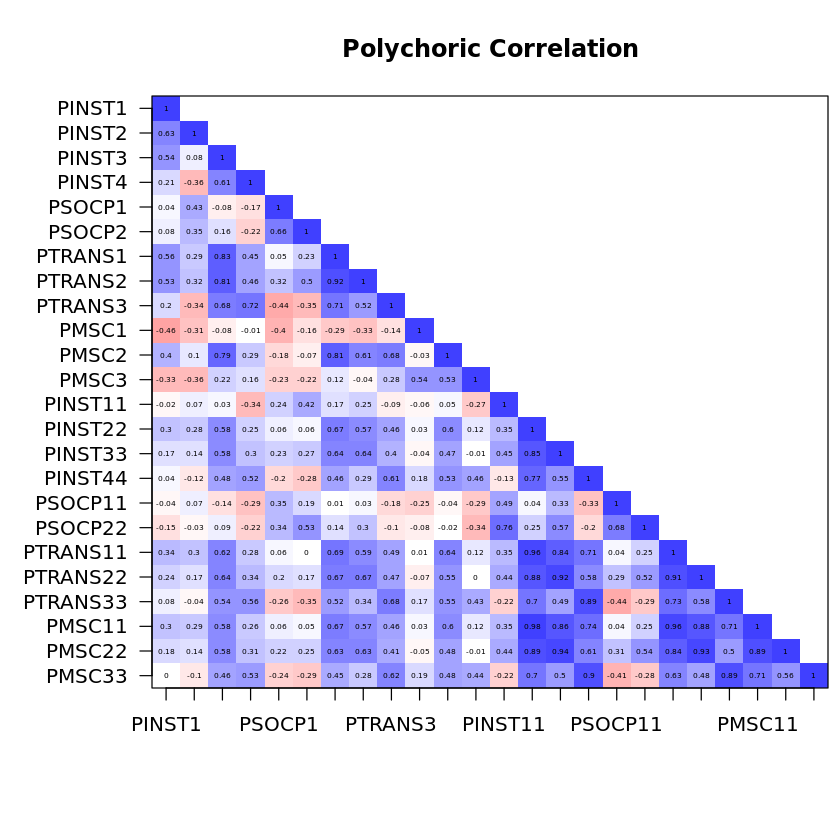

In [57]:
## Polychoric correlation
poly_cor = polychoric(features)
rho = poly_cor$rho
save(rho, file = "polychoric")
### Thresholds/Scaling results
#poly_cor$tau
cor.plot(poly_cor$rho, numbers=T, upper=FALSE, main = "Polychoric Correlation", show.legend = FALSE)

Comparison with Pearson correlation

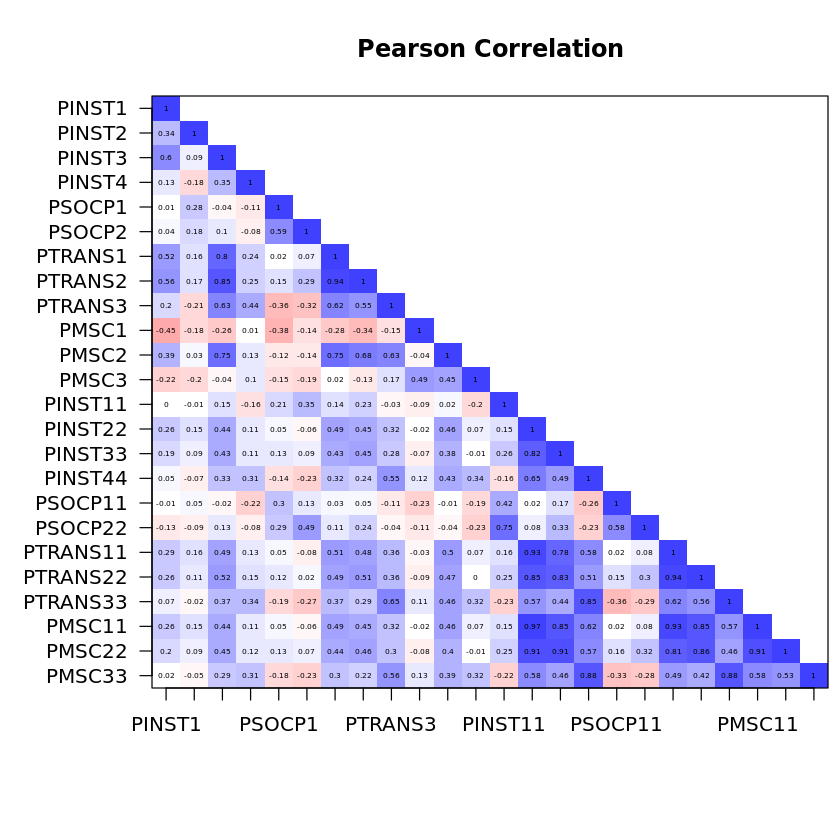

In [59]:
## Pearson Correlation
pear_cor = cor(features)
cor.plot(pear_cor, numbers=T, upper=FALSE, main = "Pearson Correlation", show.legend = FALSE)

Factor selection with polychoric correlation. The optimal number of factors selected is 4. In other words, only 4 factors have eigen values more than 1.

Warning message in fa.parallel(rho, fm = "pa", fa = "fa", main = "Scree Plot"):
“It seems as if you are using a correlation matrix, but have not specified the number of cases. The number of subjects is arbitrarily set to be 100  ”Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
“The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method.”

Parallel analysis suggests that the number of factors =  4  and the number of components =  NA 


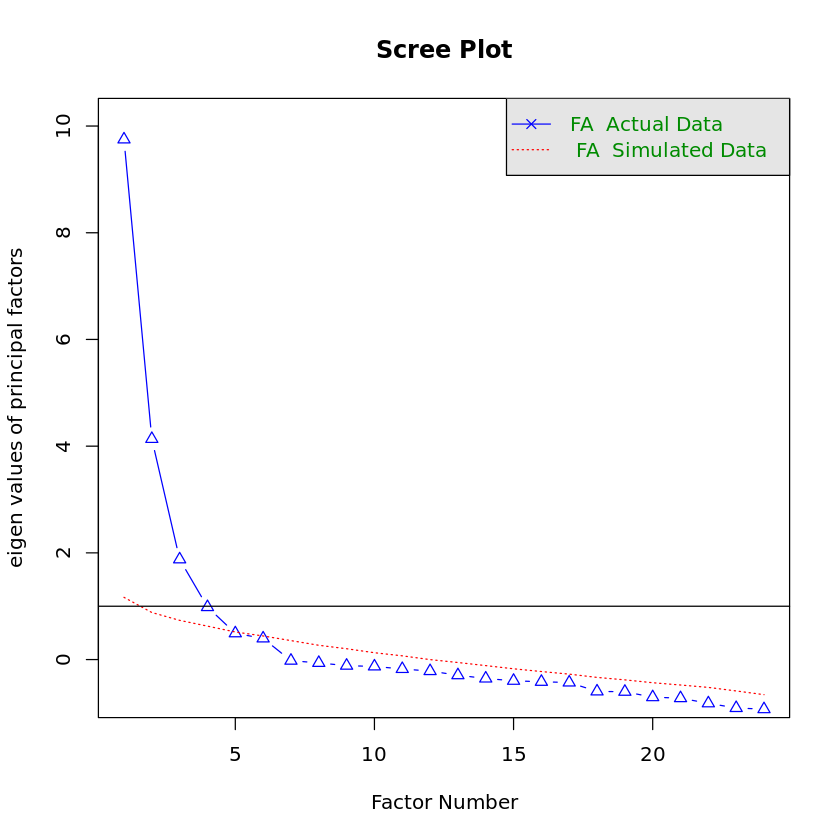

In [58]:
load("polychoric")
# Scree plot
fa.parallel(rho, fm="pa", fa="fa", main = "Scree Plot")

Factor loadings for identifying which variables load to which factors (i.e, ML1, ML2, ML3, ML4). For example, PINST1 positively loads to factor ML1. Relevant variables for each factor should have factor loading score above 0.5 or below -0.5. The rest of the variables that do not load to any factor should be eliminated. 

In [66]:
# Model with default features
poly_model = fa(features, nfactor=4, cor="poly", fm="mle", rotate = "none")
save(poly_model, file = "poly_model")
poly_model$loadings

Warning message in polychoric(r, correct = correct, weight = weight):
“The items do not have an equal number of response alternatives, global set to FALSE.”Warning message in matpLower(x, nvar, gminx, gmaxx, gminy, gmaxy):
“213 cells were adjusted for 0 values using the correction for continuity. Examine your data carefully.”Warning message in cor.smooth(mat):
“Matrix was not positive definite, smoothing was done”In factor.scores, the correlation matrix is singular, an approximation is used
Warning message in cor.smooth(r):
“Matrix was not positive definite, smoothing was done”


Loadings:
         ML2    ML1    ML3    ML4   
PINST1   -0.119  0.649 -0.202  0.413
PINST2   -0.451  0.889              
PINST3    0.590  0.393 -0.168  0.504
PINST4    0.571 -0.110 -0.399  0.377
PSOCP1   -0.205  0.387  0.410       
PSOCP2   -0.111  0.341  0.561  0.273
PTRANS1   0.528  0.598 -0.129  0.559
PTRANS2   0.439  0.592         0.605
PTRANS3   0.741        -0.377  0.439
PMSC1     0.165 -0.271 -0.106 -0.410
PMSC2     0.545  0.394 -0.274  0.375
PMSC3     0.344 -0.234 -0.445       
PINST11   0.277  0.226  0.693       
PINST22   0.695  0.669        -0.198
PINST33   0.739  0.535  0.283       
PINST44   0.739  0.235 -0.507 -0.245
PSOCP11          0.106  0.717       
PSOCP22   0.324  0.137  0.924       
PTRANS11  0.676  0.676        -0.137
PTRANS22  0.744  0.567  0.218       
PTRANS33  0.664  0.281 -0.589 -0.122
PMSC11    0.693  0.671        -0.193
PMSC22    0.755  0.542  0.241       
PMSC33    0.681  0.221 -0.569 -0.214

                 ML2   ML1   ML3   ML4
SS loadings    7.136 5.1

Eigen values of the common factors. Here, there only 4 eigen values greater than 1, suggesting 4 optimal factors for the dataset. Same results as the screen plot above.

In [96]:
poly_model$values 

[1]  9.98042155  4.63202510  2.31174987  1.53921041  0.82759438  0.76423058
 [7]  0.29175532  0.21158647  0.12199290  0.07478084  0.01469274 -0.01271428
[13] -0.02584489 -0.04540637 -0.04970006 -0.08146746 -0.09107270 -0.10132439
[19] -0.15156342 -0.21162214 -0.24651358 -0.31262087 -0.39467474 -0.55218310

Commulanity or total variance of each variable explained by the factors. For example, the 4 factors explain only 0.2801 of the total variation in variable PMSC1, and hence should be dropped. In other words, it doesn't seem to correlate with the other variables in the dataset. All variables with lower communality (i.e., higher unique variance) should be dropped. 

In [98]:
#Communality estimates for each item. These are merely the sum of squared factor loadings for that item.
poly_model$communality

PINST1    PINST2    PINST3    PINST4    PSOCP1    PSOCP2   PTRANS1   PTRANS2 
0.6465220 0.9950054 0.7851609 0.6387242 0.3600961 0.5173618 0.9661391 0.9165740 
  PTRANS3     PMSC1     PMSC2     PMSC3   PINST11   PINST22   PINST33   PINST44 
0.8844507 0.2801219 0.6680815 0.3721289 0.6159046 0.9754256 0.9162776 0.9194890 
  PSOCP11   PSOCP22  PTRANS11  PTRANS22  PTRANS33    PMSC11    PMSC22    PMSC33 
0.5273591 0.9777214 0.9391117 0.9232264 0.8814383 0.9728909 0.9309291 0.8831920

Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at  all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis. Here the test is statistically significant. 

In [100]:
poly_model$PVAL

[1] 0

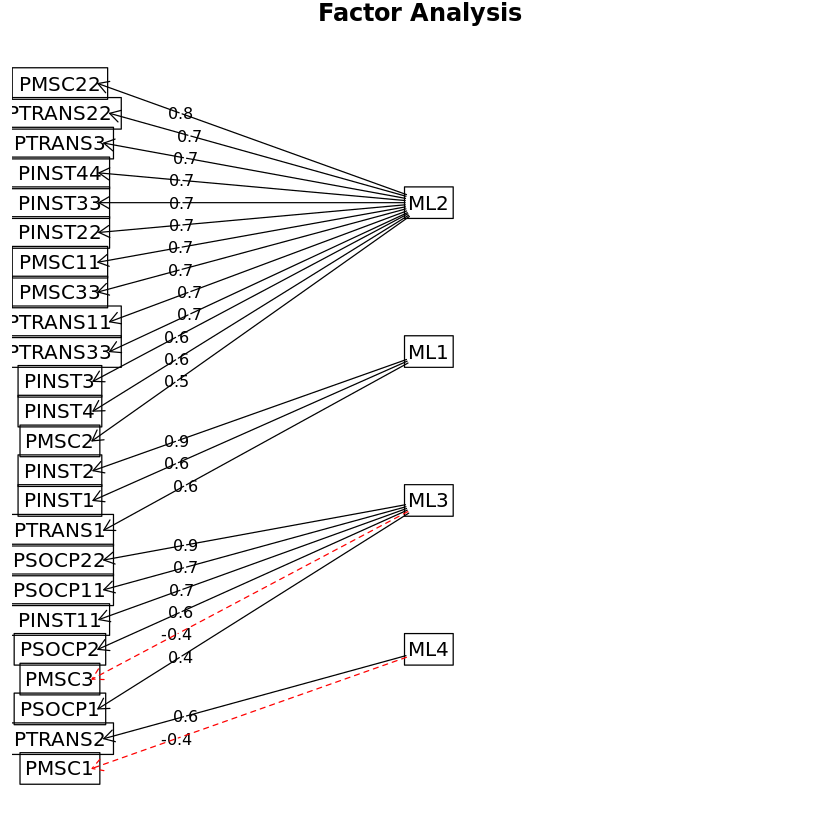

In [102]:
load("poly_model")
# Cluster analysis plot
fa.diagram(poly_model)

## Model 2. Here i change the rotation to "simplimax", results stays the same as the default setting

In [67]:
# Polychoric factor analysis
poly_model2 = fa(features, nfactor=4, cor="poly", fm="mle", rotate = "simplimax")
save(poly_model2, file = "poly_model")
poly_model2$loadings

Warning message in polychoric(r, correct = correct, weight = weight):
“The items do not have an equal number of response alternatives, global set to FALSE.”Warning message in matpLower(x, nvar, gminx, gmaxx, gminy, gmaxy):
“213 cells were adjusted for 0 values using the correction for continuity. Examine your data carefully.”Warning message in cor.smooth(mat):
“Matrix was not positive definite, smoothing was done”Loading required namespace: GPArotation
Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
“I am sorry, to do these rotations requires the GPArotation package to be installed”In factor.scores, the correlation matrix is singular, an approximation is used
Warning message in cor.smooth(r):
“Matrix was not positive definite, smoothing was done”


Loadings:
         ML2    ML1    ML3    ML4   
PINST1   -0.119  0.649 -0.202  0.413
PINST2   -0.451  0.889              
PINST3    0.590  0.393 -0.168  0.504
PINST4    0.571 -0.110 -0.399  0.377
PSOCP1   -0.205  0.387  0.410       
PSOCP2   -0.111  0.341  0.561  0.273
PTRANS1   0.528  0.598 -0.129  0.559
PTRANS2   0.439  0.592         0.605
PTRANS3   0.741        -0.377  0.439
PMSC1     0.165 -0.271 -0.106 -0.410
PMSC2     0.545  0.394 -0.274  0.375
PMSC3     0.344 -0.234 -0.445       
PINST11   0.277  0.226  0.693       
PINST22   0.695  0.669        -0.198
PINST33   0.739  0.535  0.283       
PINST44   0.739  0.235 -0.507 -0.245
PSOCP11          0.106  0.717       
PSOCP22   0.324  0.137  0.924       
PTRANS11  0.676  0.676        -0.137
PTRANS22  0.744  0.567  0.218       
PTRANS33  0.664  0.281 -0.589 -0.122
PMSC11    0.693  0.671        -0.193
PMSC22    0.755  0.542  0.241       
PMSC33    0.681  0.221 -0.569 -0.214

                 ML2   ML1   ML3   ML4
SS loadings    7.136 5.1

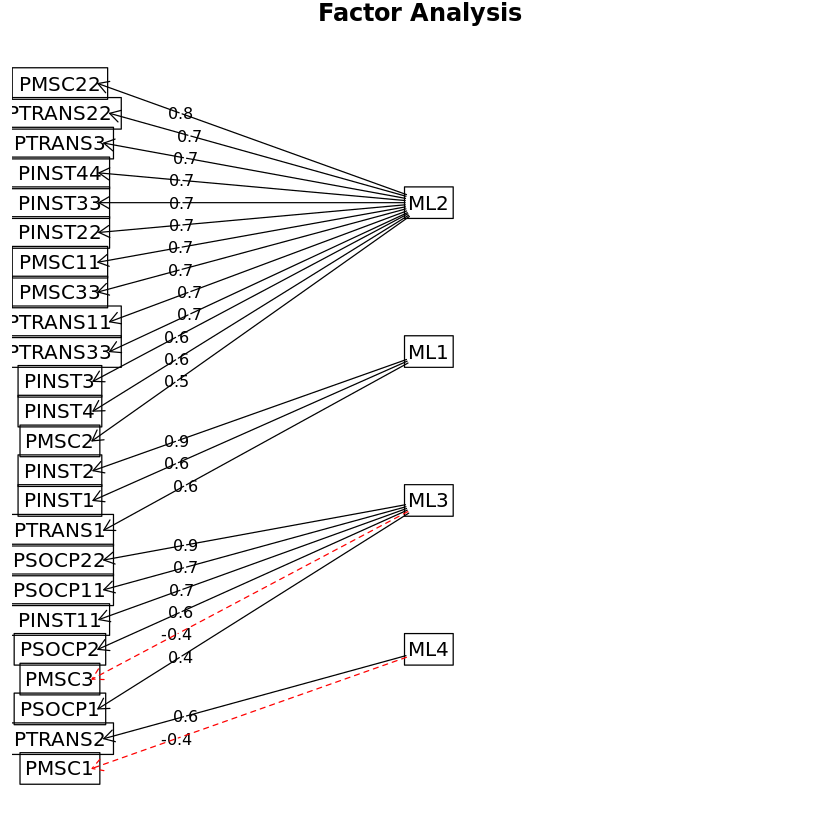

In [103]:
load("poly_model")
# Cluster analysis plot
fa.diagram(poly_model2)

## Model 3. Change the rotation to varimax, result is little different. If model 1 and 2 is consistent with your intuition. We focus on that.

In [68]:
# Polychoric factor analysis
poly_model3 = fa(features, nfactor=4, cor="poly", fm="mle", rotate = "varimax")
save(poly_model3, file = "poly_model")
poly_model3$loadings

Warning message in polychoric(r, correct = correct, weight = weight):
“The items do not have an equal number of response alternatives, global set to FALSE.”Warning message in matpLower(x, nvar, gminx, gmaxx, gminy, gmaxy):
“213 cells were adjusted for 0 values using the correction for continuity. Examine your data carefully.”Warning message in cor.smooth(mat):
“Matrix was not positive definite, smoothing was done”In factor.scores, the correlation matrix is singular, an approximation is used
Warning message in cor.smooth(r):
“Matrix was not positive definite, smoothing was done”


Loadings:
         ML2    ML4    ML3    ML1   
PINST1    0.124  0.417 -0.110  0.667
PINST2    0.195 -0.102         0.973
PINST3    0.422  0.775              
PINST4    0.213  0.629 -0.292 -0.336
PSOCP1                  0.417  0.420
PSOCP2           0.148  0.593  0.371
PTRANS1   0.465  0.815         0.286
PTRANS2   0.351  0.783  0.261  0.334
PTRANS3   0.361  0.769 -0.229 -0.333
PMSC1     0.158 -0.303 -0.143 -0.378
PMSC2     0.463  0.658 -0.116       
PMSC3     0.176  0.164 -0.415 -0.377
PINST11   0.265         0.738       
PINST22   0.950  0.226         0.123
PINST33   0.794  0.301  0.441       
PINST44   0.814  0.216 -0.382 -0.251
PSOCP11                 0.720       
PSOCP22   0.176         0.968       
PTRANS11  0.913  0.272         0.150
PTRANS22  0.811  0.343  0.383       
PTRANS33  0.744  0.308 -0.459 -0.149
PMSC11    0.946  0.229         0.126
PMSC22    0.832  0.280  0.400       
PMSC33    0.761  0.225 -0.451 -0.224

                 ML2   ML4   ML3   ML1
SS loadings    7.534 4.2

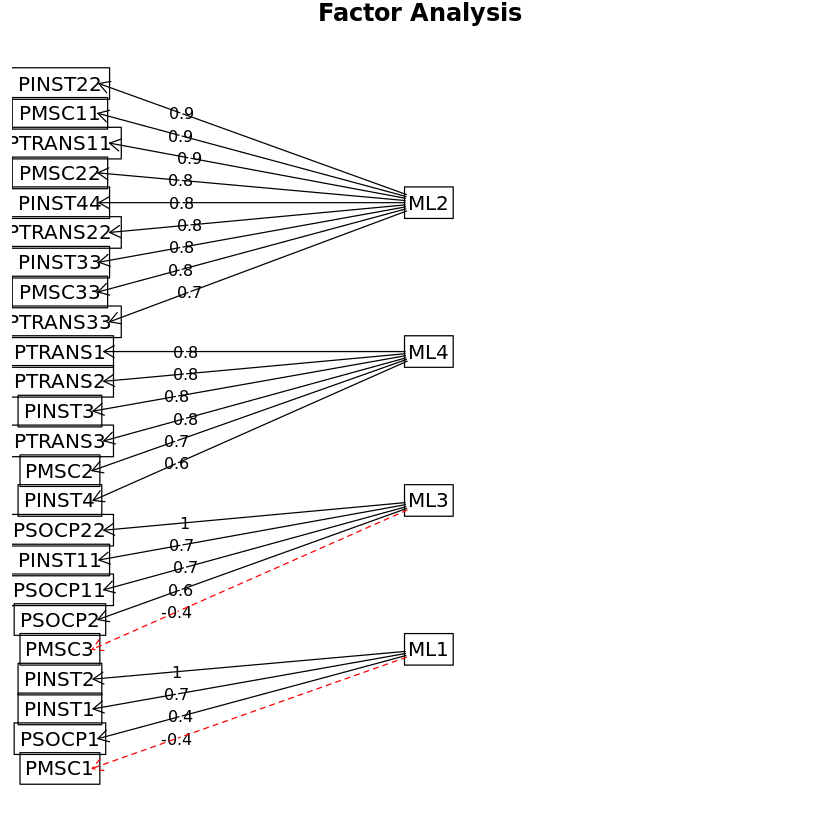

In [73]:
load("poly_model")
# Cluster analysis plot
fa.diagram(poly_model3)

## DEMOGRAPHICS

In [1]:
import pandas as pd
demo = pd.read_csv('demo.csv')

In [2]:
demo.head(3)

,AGE,GENDER,BUSLOCTN,TYPEOWN,NUEMPL,BUSDURATION,NATUREINDUSTRY,OWNERSQUALIF,YRSBFOWINGBUS,TYPEEMPLOYEE,...,Strongtieswithbusinessrelatedknowledgeskillsandexperienceprovide,Valuesattitudeinformationandskillsgainedfromstrongtiescontribute,Attitudeinformationandskillsgainedfromstrongtiescontributetoward,mybusinessincomehas,mybusinessprofitshave,mymarketsharehas,myreturnonincome,thenumberofemployees,productlines,@_index
0,2,1,2,1,1,2,4,4,2,3,...,3,4,4,4,4,4,4,4,3,1
1,2,1,3,1,1,3,4,4,2,3,...,4,1,4,4,4,4,4,2,2,2
2,2,2,1,1,2,3,3,4,1,2,...,4,4,5,4,5,4,2,4,3,3


In [6]:
demo['AGE'].value_counts()

3    88
2    64
5    22
1    18
4    10
Name: AGE, dtype: int64

In [8]:
pd.set_option('display.max_columns', None)
demo.describe()

,AGE,GENDER,BUSLOCTN,TYPEOWN,NUEMPL,BUSDURATION,NATUREINDUSTRY,OWNERSQUALIF,YRSBFOWINGBUS,TYPEEMPLOYEE,MOTMIGGH,PRMTTEAMSUPT,KPEMPLYEETASK,MOTIVATEEMPYEE,GETEMPYEEWKTGER,OVERCOMENEGTIVEEMPYEE,MNGESOLVEDIFFCTPROBLM,OPPSFINDMEANSTOGETWANT,CONFIDENTDEALEFFICIENTLYUNEXPECTEDEVENTS,STICKMYAIMSACCMPLSHGOAL,PROCLIVITYLOWRISKPROJECT,UNIMPORTNATPROCLIVITYLOWRISKPRJTS,IMPORTNATPROCLIVITYHIGHRISKPRJTS,UNIMPORTNATPROCLIVITYHIGHRISKPRJTS,Youreceiveadequatebusinessmanagementrelatedtraining,Youreceiveadequatebusinessmanagementrelatedtraining_A,Youreceiveusefultechnicalsupportfromgovernmentagencies,Youreceiveadequatecapitalforstartuporexpansionsupport,Peoplecomplywithcourtrulings,Thereisefficientlinkagebetweenresearchinstitutionsandindustry,ThereisclearandconsistenttradepolicyonsmallbusinessinGhana,Thereisanestablishedinstitutiontocoordinategovernmentsupportserv,ThereislowtaxburdenonbusinessesinGhana,Therearenodelaysintheregistrationlicensingprocesses,ThereissimplebusinessregistrationprocessesinGhana,ThereislowcostofregisteringabusinessinGhana,Inadequateskilledpersonneltoprovideexpertadvice,Inadequatefinancialinstitutiontograndloantoimmigrant,Highcostofutilitycharges,DifficultAccesstonewtechnology,Inadequatetechnicalskills,Hightaxandimportduties,Difficultyinaccessingresidencyvisapermit,Highcostofregistrationlicensing,Delaysinregistrationlicensingprocesses,Toomanyproceduresinregistrationlicensingprocesses,Idependonethnictiessocialnetworkforprivateloans,Socialnetworkprovidemewithcoethnicemployees,Socialnetworkprovidemewithcoethniccustomers,Socialnetworkprovidemewithcoethnicsuppliers,Strongtieswithbusinessrelatedknowledgeskillsandexperienceprovide,Valuesattitudeinformationandskillsgainedfromstrongtiescontribute,Attitudeinformationandskillsgainedfromstrongtiescontributetoward,mybusinessincomehas,mybusinessprofitshave,mymarketsharehas,myreturnonincome,thenumberofemployees,productlines,@_index
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.00000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.00000,202.000000,202.000000
mean,2.772277,1.351485,2.267327,2.569307,1.930693,2.732673,3.029703,3.569307,2.108911,2.717822,2.103960,4.108911,4.732673,4.405941,4.599010,4.346535,4.559406,4.396040,4.490099,3.846535,3.841584,2.742574,3.638614,2.470297,2.054455,2.326733,2.158416,2.089109,4.108911,2.400990,2.579208,3.009901,2.064356,2.19802,2.287129,3.128713,2.762376,2.361386,1.905941,2.742574,2.673267,1.316832,2.559406,2.896040,2.099010,2.168317,3.856436,4.009901,4.212871,3.940594,4.019802,3.905941,4.103960,3.881188,3.886139,3.668317,3.801980,3.50495,3.247525,101.500000
std,1.054544,0.478620,1.399297,1.348538,1.199149,0.506497,0.913747,1.001317,0.667676,0.602300,0.958899,1.318834,0.588295,0.700792,0.830153,0.682921,0.497692,0.490288,0.632771,0.962590,0.610565,0.888326,0.859882,0.655333,0.459293,0.853543,0.749563,0.727553,0.312301,1.093899,0.873127,0.834517,1.017663,0.88120,0.906984,0.953270,0.865577,0.812278,0.750499,0.663977,0.706880,0.580456,0.945761,0.439453,0.630958,0.920408,0.854711,0.951511,0.410354,0.453220,0.545998,0.890002,0.672179,0.569317,0.754361,0.664588,0.712641,0.98873,0.745213,58.456537
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,3.000000,4.000000,4.000000,3.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000,1.00000,1.000000,2.000000,2.000000,1.00000

# CFA

In [1]:
install.packages("lavaan")

also installing the dependencies ‘tmvnsim’, ‘mnormt’, ‘pbivnorm’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [11]:
library(lavaan)

This is lavaan 0.6-7
lavaan is BETA software! Please report any bugs.


## DATA

In [1]:
dat = read.csv('dave_final.csv')

In [2]:
head(dat)

,X,PINST1,PINST2,PINST3,PINST4,PSOCP1,PSOCP2,PTRANS1,PTRANS2,PTRANS3,⋯,PMSC22,PMSC33,PROFITS,AGE,mybusinessincomehas,mybusinessprofitshave,mymarketsharehas,myreturnonincome,thenumberofemployees,productlines
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,4,4,5,5,3,4,5,5,5,⋯,5,5,33,2,4,4,4,4,4,3
2,1,3,4,1,4,4,4,3,2,3,⋯,5,5,33,2,4,4,4,4,2,2
3,2,4,4,5,4,4,5,5,5,5,⋯,5,5,33,2,4,5,4,2,4,3
4,3,4,4,5,5,5,4,5,5,5,⋯,5,5,36,5,4,4,4,4,4,3
5,4,4,4,4,4,4,5,5,5,4,⋯,5,4,37,3,4,3,4,4,5,3
6,5,3,4,4,4,4,4,5,5,5,⋯,5,5,36,3,2,2,2,2,1,2


### Check assumptions

Note that because CFAs (and all SEM models) are based on the covariances among variances, they are susceptible to the effects of violations to the assumption of normality (especially skew and outliers), which can strongly affect covariances. Before running your model, you should examine your variables to check that there are no serious deviations from normality. 

In [7]:
install.packages("MVN")
library(MVN)

Warning message:
“dependency ‘pbkrtest’ is not available”also installing the dependencies ‘locfit’, ‘ash’, ‘FNN’, ‘multicool’, ‘hdrcde’, ‘ks’, ‘bitops’, ‘rainbow’, ‘RCurl’, ‘modeltools’, ‘lmtest’, ‘fds’, ‘mvtnorm’, ‘pcaPP’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘reshape’, ‘vcd’, ‘laeken’, ‘ranger’, ‘NADA’, ‘truncnorm’, ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘pls’, ‘cvTools’, ‘e1071’, ‘fda’, ‘rrcov’, ‘fpc’, ‘GGally’, ‘kernlab’, ‘mclust’, ‘sROC’, ‘VIM’, ‘zCompositions’, ‘RcppEigen’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘DEoptimR’, ‘sgeostat’, ‘robCompositions’, ‘webshot’, ‘carData’, ‘abind’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘nortest’, ‘moments’, ‘robustbase’, ‘mvoutlier’, ‘psych’, ‘energy’, ‘kableExtra’, ‘car’

Warning message in install.packages("MVN"):
“installation of package ‘nloptr’ had non-zero exit status”Warning message in install.packages("MVN"):
“installation of package ‘lme4’ had non-zero exit status”Warning message in install

ERROR: Error in library(MVN): there is no package called ‘MVN’


In [8]:
uniPlot(dat, type = "histogram")

ERROR: Error in uniPlot(dat, type = "histogram"): could not find function "uniPlot"


## Specifying a CFA model

In [52]:
HS.model <- ' f2  =~ PMSC22 + PTRANS22 + PTRANS3 + PINST44 + PINST33 + PINST22 + PMSC11 + PMSC33 + PTRANS11 + PTRANS33 + PINST3 + PINST4 + PMSC2
              f1 =~ PINST2 + PINST1 + PTRANS1
              f3 =~ PSOCP22 + PSOCP11 + PINST11 + PSOCP2
              f4   =~ PTRANS2 '

# factors are f2, f1, f3 and f4. Each equation specify the variables that loads onto each factor

In [53]:
fit <- cfa(HS.model, data=dat, 
           std.lv=TRUE, ordered=c("PMSC22", "PTRANS22", "PTRANS3", "PINST44", "PINST33", "PINST22", "PMSC11", "PMSC33", "PTRANS11", "PTRANS33", "PINST3", "PINST4", "PMSC2",
"PINST2", "PINST1", "PTRANS1", "PSOCP22", "PSOCP11", "PINST11", "PSOCP2"))

Warning message in lav_samplestats_step2(UNI = FIT, wt = wt, ov.names = ov.names, :
“lavaan WARNING: correlation between variables PTRANS11 and PTRANS22 is (nearly) 1.0”Warning message in lav_samplestats_step2(UNI = FIT, wt = wt, ov.names = ov.names, :
“lavaan WARNING: correlation between variables PINST4 and PTRANS3 is (nearly) 1.0”Warning message in lav_samplestats_step2(UNI = FIT, wt = wt, ov.names = ov.names, :
“lavaan WARNING: correlation between variables PMSC11 and PINST22 is (nearly) 1.0”Warning message in lav_samplestats_step2(UNI = FIT, wt = wt, ov.names = ov.names, :
“lavaan WARNING: correlation between variables PMSC2 and PINST3 is (nearly) 1.0”Warning message in lav_samplestats_step2(UNI = FIT, wt = wt, ov.names = ov.names, :
“lavaan WARNING: correlation between variables PTRANS1 and PINST3 is (nearly) 1.0”Warning message in lav_samplestats_step2(UNI = FIT, wt = wt, ov.names = ov.names, :
“lavaan WARNING: correlation between variables PTRANS1 and PMSC2 is (nearly) 1.0”Warn

In [28]:
fit

lavaan 0.6-7 ended normally after 72 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of free parameters                         66
                                                      
  Number of observations                           200
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                              2347.780     981.221
  Degrees of freedom                               184         184
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  2.762
  Shift parameter                                          131.057
       simple second-order correction                             

In [17]:
install.packages("knitr")
library(knitr)
options(knitr.kable.NA = '') # this will hide missing values in the kable table

also installing the dependency ‘xfun’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [29]:
summary(fit, fit.measures=TRUE, standardized=TRUE)

lavaan 0.6-7 ended normally after 72 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of free parameters                         66
                                                      
  Number of observations                           200
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                              2347.780     981.221
  Degrees of freedom                               184         184
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  2.762
  Shift parameter                                          131.057
       simple second-order correction                             

Model Test Baseline Model:

  Test statistic                            442896.355  113508.399
  Degrees of freedom             

## Parameter Estimates

In [30]:
parameterEstimates(fit, standardized=TRUE)

lhs,op,rhs,est,se,z,pvalue,ci.lower,ci.upper,std.lv,std.all,std.nox
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
f2,=~,PMSC22,0.97407920,0.007360419,132.3401869,0.000000e+00,0.9596530,0.98850535,0.97407920,0.97407920,0.97407920
f2,=~,PTRANS22,0.99057477,0.002852022,347.3236537,0.000000e+00,0.9849849,0.99616463,0.99057477,0.99057477,0.99057477
f2,=~,PTRANS3,0.74639610,0.032410469,23.0294757,0.000000e+00,0.6828727,0.80991945,0.74639610,0.74639610,0.74639610
f2,=~,PINST44,0.90855906,0.014048965,64.6708881,0.000000e+00,0.8810236,0.93609453,0.90855906,0.90855906,0.90855906
f2,=~,PINST33,0.92907608,0.015068348,61.6574593,0.000000e+00,0.8995427,0.95860950,0.92907608,0.92907608,0.92907608
f2,=~,PINST22,0.99755483,0.001423931,700.5642106,0.000000e+00,0.9947640,1.00034569,0.99755483,0.99755483,0.99755483
f2,=~,PMSC11,0.99789377,0.001429912,697.8709967,0.000000e+00,0.9950912,1.00069635,0.99789377,0.99789377,0.99789377
f2,=~,PMSC33,0.90405309,0.014417531,62.7051265,0.000000e+00,0.8757953,0.93231093,0.90405309,0.90405309,0.90405309
f2,=~,PTRANS11,0.99029063,0.004210508,235.1950355,0.000000e+00,0.9820382,0.99854308,0.99029063,0.99029063,0.99029063


In [19]:
library(dplyr) 
library(tidyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [31]:
parameterEstimates(fit, standardized=TRUE) %>% 
  filter(op == "=~") %>% 
  select('Latent Factor'=lhs, Indicator=rhs, B=est, SE=se, Z=z, 'p-value'=pvalue, Beta=std.all) %>% 
  kable(digits = 3, format="pandoc", caption="Factor Loadings")



Table: Factor Loadings

Latent Factor   Indicator         B      SE         Z   p-value     Beta
--------------  ----------  -------  ------  --------  --------  -------
f2              PMSC22        0.974   0.007   132.340     0.000    0.974
f2              PTRANS22      0.991   0.003   347.324     0.000    0.991
f2              PTRANS3       0.746   0.032    23.029     0.000    0.746
f2              PINST44       0.909   0.014    64.671     0.000    0.909
f2              PINST33       0.929   0.015    61.657     0.000    0.929
f2              PINST22       0.998   0.001   700.564     0.000    0.998
f2              PMSC11        0.998   0.001   697.871     0.000    0.998
f2              PMSC33        0.904   0.014    62.705     0.000    0.904
f2              PTRANS11      0.990   0.004   235.195     0.000    0.990
f2              PTRANS33      0.908   0.016    58.217     0.000    0.908
f2              PINST3        0.992   0.004   260.029     0.000    0.992
f2              PINST4   

In [33]:
lavResiduals(fit)

,PMSC22,PTRANS22,PTRANS3,PINST44,PINST33,PINST22,PMSC11,PMSC33,PTRANS11,PTRANS33,⋯,PINST4,PMSC2,PINST2,PINST1,PTRANS1,PSOCP22,PSOCP11,PINST11,PSOCP2,PTRANS2
PMSC22,0.00000000,-0.01853308,-0.305697388,-0.199291485,0.049976294,0.011897274,0.011567120,-0.23600420,-0.044630303,-0.31746243,⋯,-0.15403834,-0.433416385,0.271902078,-2.147528e-01,-2.986766e-01,0.61941754,0.36205741,0.433466985,0.20377306,3.785823e-02
PTRANS22,-0.01853308,0.00000000,-0.246970650,-0.266633777,0.021541896,-0.026868623,-0.027204368,-0.36290281,0.018043089,-0.23037285,⋯,-0.11945040,-0.370285426,0.312137981,-1.528033e-01,-2.763924e-01,0.59182440,0.33473788,0.441845259,0.11639546,6.959141e-02
PTRANS3,-0.30569739,-0.24697065,0.000000000,0.007844135,-0.283583781,-0.256215571,-0.256468554,0.02523244,-0.208195719,0.09350008,⋯,0.60115083,0.019618608,-0.392188136,-1.081009e-01,1.106835e-01,-0.17901312,-0.19673522,-0.142451747,-0.51567499,2.421552e-01
PINST44,-0.19929149,-0.26663378,0.007844135,0.000000000,-0.251393147,-0.005612173,-0.056142029,0.09051870,-0.090282730,0.07706313,⋯,0.07170187,-0.342121898,-0.105111521,-3.504773e-01,-4.243020e-01,-0.42294470,-0.43508813,-0.290781376,-0.36547561,-1.622635e-01
PINST33,0.04997629,0.02154190,-0.283583781,-0.251393147,0.000000000,-0.003709741,0.011090023,-0.28604340,-0.008463065,-0.29551173,⋯,-0.14063044,-0.400467673,0.264610371,-2.052504e-01,-2.583264e-01,0.63773899,0.37241206,0.440994923,0.22491183,5.337886e-02
PINST22,0.01189727,-0.02686862,-0.256215571,-0.005612173,-0.003709741,0.000000000,0.002270192,-0.09044510,-0.013486988,-0.08087742,⋯,-0.24213996,-0.328889080,0.983045512,1.507457e-02,-2.872591e-01,0.22330792,-0.01112235,0.387434362,-0.08475046,-1.530887e-02
PMSC11,0.01156712,-0.02720437,-0.256468554,-0.056142029,0.011090023,0.002270192,0.000000000,-0.09075152,-0.013822636,-0.08118519,⋯,-0.24232062,-0.329225413,0.983062289,1.492287e-02,-2.875984e-01,0.22327197,-0.01113767,0.387410853,-0.08477079,-1.546467e-02
PMSC33,-0.23600420,-0.36290281,0.025232439,0.090518701,-0.286043395,-0.090445105,-0.090751524,0.00000000,-0.183247169,0.08957837,⋯,0.08744426,-0.386366118,-0.084035016,-3.946363e-01,-4.336068e-01,-0.51067248,-0.52755958,-0.386445371,-0.37843537,-1.859177e-01
PTRANS11,-0.04463030,0.01804309,-0.208195719,-0.090282730,-0.008463065,-0.013486988,-0.013822636,-0.18324717,0.000000000,-0.03233625,⋯,-0.20331522,-0.280515629,0.985003340,6.024206e-02,-2.594237e-01,0.22943491,-0.01018335,0.394451704,-0.13466049,1.453622e-02
PTRANS33,-0.31746243,-0.23037285,0.093500084,0.077063132,-0.295511733,-0.080877419,-0.081185193,0.08957837,-0.032336249,0.00000000,⋯,0.12649861,-0.315807237,-0.019923921,-3.157719e-01,-3.514131e-01,-0.52082226,-0.56427004,-0.392711719,-0.43758872,-1.153927e-01


In [35]:
lavTables(fit)

id,lhs,rhs,nobs,row,col,obs.freq,obs.prop,est.prop,X2
<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,PMSC22,PTRANS22,200,1,1,11,0.055,4.939853e-02,1.270340e-01
1,PMSC22,PTRANS22,200,2,1,0,0.000,2.551188e-02,5.102377e+00
1,PMSC22,PTRANS22,200,3,1,4,0.020,8.958598e-05,8.850148e+02
1,PMSC22,PTRANS22,200,1,2,0,0.000,5.597188e-03,1.119438e+00
1,PMSC22,PTRANS22,200,2,2,34,0.170,1.210019e-01,3.968228e+00
1,PMSC22,PTRANS22,200,3,2,0,0.000,4.340093e-02,8.680186e+00
1,PMSC22,PTRANS22,200,1,3,0,0.000,4.281667e-06,8.563334e-04
1,PMSC22,PTRANS22,200,2,3,0,0.000,2.348623e-02,4.697247e+00
1,PMSC22,PTRANS22,200,3,3,151,0.755,7.315095e-01,1.508673e-01


In [38]:
fitMeasures(fit)

npar                          fmin 
                       66.000                         5.869 
                        chisq                            df 
                     2347.780                       184.000 
                       pvalue                  chisq.scaled 
                        0.000                       981.221 
                    df.scaled                 pvalue.scaled 
                      184.000                         0.000 
         chisq.scaling.factor                baseline.chisq 
                        2.762                    442896.355 
                  baseline.df               baseline.pvalue 
                      210.000                         0.000 
        baseline.chisq.scaled            baseline.df.scaled 
                   113508.399                       210.000 
       baseline.pvalue.scaled baseline.chisq.scaling.factor 
                        0.000                         3.907 
                          cfi                           tli 
                        0.995                         0.994 
                         nnfi                           rfi 
                        0.994                         0.994 
                          nfi                          pnfi 
                        0.995                         0.872 
                          ifi                           rni 
                        0.995                         0.995 
                   cfi.scaled                    tli.scaled 
                        0.993                         0.992 
                   cfi.robust                    tli.robust 
                           NA                            NA 
                  nnfi.scaled                   nnfi.robust 
                        0.992                            NA 
                   rfi.scaled                    nfi.scaled 
                        0.990                         0.991 
                   ifi.scaled                    rni.scaled 
                        0.993                         0.993 
                   rni.robust                         rmsea 
                           NA                         0.243 
               rmsea.ci.lower                rmsea.ci.upper 
                        0.234                         0.252 
                 rmsea.pvalue                  rmsea.scaled 
                        0.000                         0.148 
        rmsea.ci.lower.scaled         rmsea.ci.upper.scaled 
                        0.139                         0.157 
          rmsea.pvalue.scaled                  rmsea.robust 
                        0.000                            NA 
        rmsea.ci.lower.robust         rmsea.ci.upper.robust 
                           NA                            NA 
          rmsea.pvalue.robust                           rmr 
                           NA                         0.277 
                   rmr_nomean                          srmr 
                        0.289                         0.292 
                 srmr_bentler           srmr_bentler_nomean 
                        0.280                         0.292 
                         crmr                   crmr_nomean 
                        0.292                         0.307 
                   srmr_mplus             srmr_mplus_nomean 
                           NA                            NA 
                        cn_05                         cn_01 
                       19.363                        20.626 
                          gfi                          agfi 
                        0.995                         0.993 
                         pgfi                           mfi 
                        0.732                         0.004

dem65 ~ ind60 + dem60

In [44]:
HS.model <- ' f2  =~ PMSC22 + PTRANS22 + PTRANS3 + PINST44 + PINST33 + PINST22 + PMSC11 + PMSC33 + PTRANS11 + PTRANS33 + PINST3 + PINST4 + PMSC2
              f1 =~ PINST2 + PINST1 + PTRANS1
              f3 =~ PSOCP22 + PSOCP11 + PINST11 + PSOCP2
              f4   =~ PTRANS2 

              PROFITS ~ f1 + f2 + f3 + f4 '

# factors are f2, f1, f3 and f4. Each equation specify the variables that loads onto each factor

In [45]:
fit <- cfa(HS.model, data=dat, 
           std.lv=TRUE, ordered=c("PMSC22", "PTRANS22", "PTRANS3", "PINST44", "PINST33", "PINST22", "PMSC11", "PMSC33", "PTRANS11", "PTRANS33", "PINST3", "PINST4", "PMSC2",
"PINST2", "PINST1", "PTRANS1", "PSOCP22", "PSOCP11", "PINST11", "PSOCP2"))

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING: some observed variances are (at least) a factor 1000 times larger than others; use varTable(fit) to investigate”Warning message in lav_samplestats_step2(UNI = FIT, wt = wt, ov.names = ov.names, :
“lavaan WARNING: correlation between variables PTRANS11 and PTRANS22 is (nearly) 1.0”Warning message in lav_samplestats_step2(UNI = FIT, wt = wt, ov.names = ov.names, :
“lavaan WARNING: correlation between variables PINST4 and PTRANS3 is (nearly) 1.0”Warning message in lav_samplestats_step2(UNI = FIT, wt = wt, ov.names = ov.names, :
“lavaan WARNING: correlation between variables PMSC11 and PINST22 is (nearly) 1.0”Warning message in lav_samplestats_step2(UNI = FIT, wt = wt, ov.names = ov.names, :
“lavaan WARNING: correlation between variables PMSC2 and PINST3 is (nearly) 1.0”Warning message in lav_samplestats_step2(UNI = FIT, wt = wt, ov.names = ov.names, :
“lavaan WARNING: correlation between var

In [46]:
summary(fit, fit.measures=TRUE, standardized=TRUE)

lavaan 0.6-7 ended normally after 95 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of free parameters                         72
                                                      
  Number of observations                           200
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                              2361.591    1026.144
  Degrees of freedom                               201         201
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  2.673
  Shift parameter                                          142.549
       simple second-order correction                             

Model Test Baseline Model:

  Test statistic                            442915.335  116456.738
  Degrees of freedom             

In [ ]:
install.packages("semTools")

In [49]:
library(semTools)

 
###############################################################################
This is semTools 0.5-3
All users of R (or SEM) are invited to submit functions or ideas for functions.
###############################################################################

Attaching package: ‘semTools’

The following object is masked from ‘package:psych’:

    skew



In [56]:
reliability(fit, dropSingle = FALSE)

For constructs with categorical indicators, the alpha and the average variance extracted are calculated from polychoric (polyserial) correlations, not from Pearson correlations.



,f2,f1,f3,f4
alpha,0.9669478,0.9638818,0.8445725,NaN
omega,0.9613040,0.7299879,0.6824072,1.0000000
omega2,0.9613040,0.7299879,0.6824072,1.0000000
omega3,1.1448977,0.4404473,0.6732901,0.9999972
avevar,0.8493457,0.6818335,0.6063826,1.0000000


In [57]:
sl <- standardizedSolution(fit)
sl <- sl$est.std[sl$op == "=~"]

In [58]:
re <- 1 - sl^2
sum(sl)^2 / (sum(sl)^2 + sum(re))

[1] 0.9858048

In [59]:
sl

[1]  0.9740792  0.9905748  0.7463961  0.9085591  0.9290761  0.9975548
 [7]  0.9978938  0.9040531  0.9902906  0.9080509  0.9916688  0.5330269
[13]  0.9923102 -0.0645043  0.5832580  1.3042813  1.1212279  0.4780732
[19]  0.7332539  0.6341632  1.0000000